In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("cowin.csv") # data for analysis

In [4]:
data.shape

(76832, 59)

In [5]:
#displaying the data
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [6]:
data.columns #printing the columns of the data

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [7]:
data.date #check total length of date

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
76827    2021-03-19
76828    2021-03-20
76829    2021-03-21
76830    2021-03-22
76831    2021-03-23
Name: date, Length: 76832, dtype: object

In [8]:
date_uni = data.date.unique() #printing the Unique dates

In [9]:
date_uni

array(['2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27',
       '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02',
       '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06',
       '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10',
       '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
       '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22',
       '2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30',
       '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03',
       '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07',
       '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15',
       '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
       '2020-04-24', '2020-04-25', '2020-04-26', '2020-

In [10]:
len(np.unique(date_uni)) #total length of Unique date

448

In [48]:
data.iso_code

0        AFG
1        AFG
2        AFG
3        AFG
4        AFG
        ... 
76827    ZWE
76828    ZWE
76829    ZWE
76830    ZWE
76831    ZWE
Name: iso_code, Length: 76832, dtype: object

In [49]:
data.iso_code.unique() # printing the unique countries

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB',
       'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA',
       'BRA', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV',
       'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'CRI',
       'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA',
       'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH',
       'OWID_EUR', 'OWID_EUN', 'FRO', 'FLK', 'FJI', 'FIN', 'FRA', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM',
       'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'OWID_INT', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA',
       'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'OWID_KOS', 'KWT', 'KGZ',
       'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX',
       'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT

In [50]:
len(np.unique(data.iso_code)) # total length of unique country

215

In [51]:
data[data["iso_code"].str.contains("OWID_")].index

Int64Index([  394,   395,   396,   397,   398,   399,   400,   401,   402,
              403,
            ...
            75734, 75735, 75736, 75737, 75738, 75739, 75740, 75741, 75742,
            75743],
           dtype='int64', length=4153)

In [11]:
rows_cowid = data[data["iso_code"].str.contains("OWID_")].index  # selecting the rows which contains "OWID" in "iso_code"

In [12]:
#removing all the rows which contains the string OWID_ in the column 'iso_code'
data.drop(rows_cowid, inplace = True)

In [13]:
data.iso_code.unique() # after Dropping

array(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN',
       'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF',
       'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'CRI', 'CIV', 'HRV',
       'CUB', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FLK',
       'FJI', 'FIN', 'FRA', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN',
       'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE',
       'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT',
       'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MCO', 'MNG', 'MNE',
       'MSR', 'MAR',

In [14]:
data.reset_index(inplace = True)

In [15]:
len(np.unique(data.iso_code)) # length of Unique iso_code after dropping

204

In [16]:
data.date.min() #earliest date in data frame

'2020-01-01'

In [17]:
#checking the column total_cases_per_million
data.total_cases_per_million.head()

0    0.026
1    0.026
2    0.026
3    0.026
4    0.026
Name: total_cases_per_million, dtype: float64

In [84]:
data["total_cases_per_100"] = data["total_cases_per_million"]  # create a new column

In [85]:
data.total_cases_per_100

0           0.026
1           0.026
2           0.026
3           0.026
4           0.026
           ...   
76827    2466.001
76828    2466.674
76829    2466.876
76830    2468.154
76831    2470.375
Name: total_cases_per_100, Length: 76832, dtype: float64

In [86]:
 data["DaysSince1Jan20"] = data["date"] # new column created using DaysSinceJan20

In [87]:
data.date

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
76827    2021-03-19
76828    2021-03-20
76829    2021-03-21
76830    2021-03-22
76831    2021-03-23
Name: date, Length: 76832, dtype: object

#### The new data frame should contain one value for each country for the following columns (and it only has these columns): 'iso_code', 'female_smokers', 'male_smokers'. Make ‘iso_code’ the index of ‘df_country’

In [88]:
df_country = data[['female_smokers','male_smokers','iso_code']].set_index('iso_code') # New dataframe "df_country"

In [89]:
# three column and each row represents one country
df_country.head()

,female_smokers,male_smokers
iso_code,,
AFG,NaN,NaN
AFG,NaN,NaN
AFG,NaN,NaN
AFG,NaN,NaN
AFG,NaN,NaN


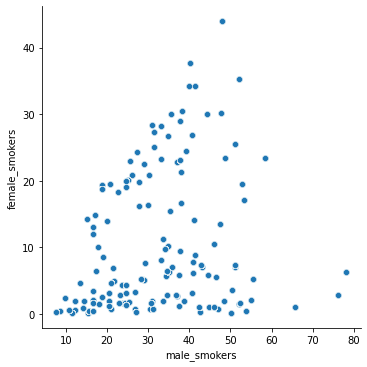

In [90]:
sns.relplot(x="male_smokers",y="female_smokers", data=df_country)

#### Create a new data frame ‘df_GBR’ that contains data only for the UK (using iso_code= GBR; should be 418 rows).

In [91]:
df_GBR = data[data['iso_code'] == 'GBR']

In [92]:
df_GBR.shape

(418, 62)

#### In ‘df_GBR’, create a new column ‘total_cases_per_million_smoothed’, which contains the moving average of the column ‘total_cases_per_million’, with a window size of 5 i.e., moving average of row x is calculated from rows x-2, x-1, x, x+1, and x+2. For x=1 and x=2, the moving average is calculated using three and four rows, respectively (same for the last two rows).

In [93]:
df_GBR['total_cases_per_million_smoothed'] = df_GBR['total_cases_per_million'].rolling(window=5).mean()

<ipython-input-93-69778362bce9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_GBR['total_cases_per_million_smoothed'] = df_GBR['total_cases_per_million'].rolling(window=5).mean()


In [94]:
df_GBR[['total_cases_per_million_smoothed','total_cases_per_million']]

,total_cases_per_million_smoothed,total_cases_per_million
72404,NaN,0.029
72405,NaN,0.029
72406,NaN,0.029
72407,NaN,0.118
72408,0.0646,0.118
...,...,...
72817,63166.3840,63329.696
72818,63248.8724,63412.762
72819,63331.3402,63491.659
72820,63412.6706,63571.307


#### plotting the graph of dashed lines of "new_cases_smoothed_per_million" for Countries IND,USA and GBR

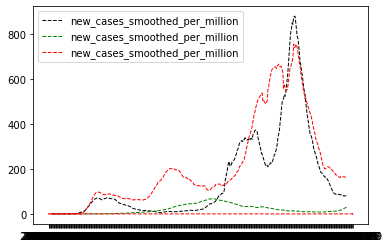

In [95]:
plt.plot('DaysSince1Jan20', 'new_cases_smoothed_per_million', data=data[data['iso_code'] == 'GBR'], color='black', linewidth=1, linestyle = '--')
plt.plot('DaysSince1Jan20', 'new_cases_smoothed_per_million', data=data[data['iso_code'] == 'IND'], color='green', linewidth=1, linestyle = '--')
plt.plot('DaysSince1Jan20', 'new_cases_smoothed_per_million', data=data[data['iso_code'] == 'USA'], color='red', linewidth=1, linestyle = '--')
plt.legend(loc='upper left', frameon =True)

#### plotting the graph of solid lines of "total_cases_per_million" for Countries IND , USA and GBR

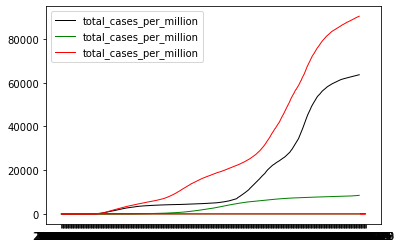

In [96]:
plt.plot('DaysSince1Jan20', 'total_cases_per_million', data=data[data['iso_code'] == 'GBR'], color='black', linewidth=1, linestyle = '-')
plt.plot('DaysSince1Jan20', 'total_cases_per_million', data=data[data['iso_code'] == 'IND'], color='green', linewidth=1, linestyle = '-')
plt.plot('DaysSince1Jan20', 'total_cases_per_million', data=data[data['iso_code'] == 'USA'], color='red', linewidth=1, linestyle = '-')
plt.legend(loc='upper left', frameon =True)

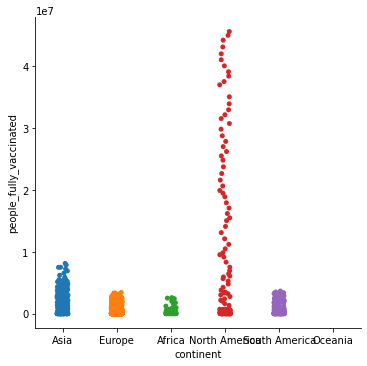

In [97]:
sns.catplot(x="continent", y="people_fully_vaccinated", data=data)

<AxesSubplot:xlabel='continent', ylabel='human_development_index'>

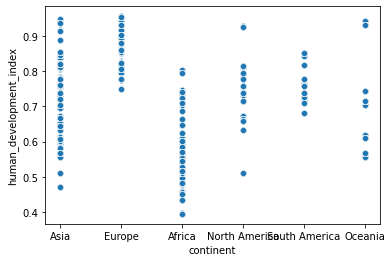

In [98]:
sns.scatterplot(x="continent", y="human_development_index",data=data)